In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
df = pd.read_csv("Editedstoredata.csv")
df.head()

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Quantity,Discount,Profit,Year,Month,Day,weekday,Week,Season,Leave
0,0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,...,2,0.00,41.9136,2016,11,8,Tuesday,45,Autumn,0
1,1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,...,3,0.00,219.5820,2016,11,8,Tuesday,45,Autumn,0
2,2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,2,0.00,6.8714,2016,6,12,Sunday,23,Summer,0
3,3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,5,0.45,-383.0310,2015,10,11,Sunday,41,Autumn,0
4,4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,...,2,0.20,2.5164,2015,10,11,Sunday,41,Autumn,0


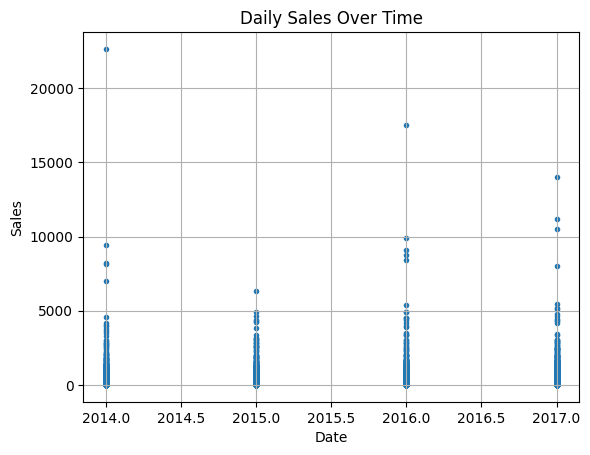

In [2]:

plt.scatter(df['Year'], df['Sales'],marker=".")
plt.title('Daily Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()



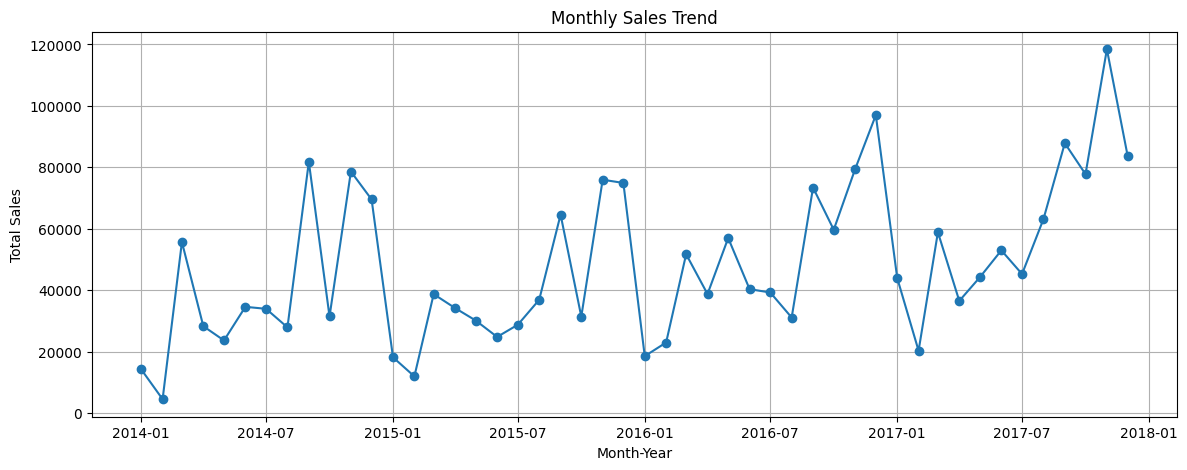

,Year,Month,Sales,Month_Year
0,2014,1,14236.895,2014-01-01
1,2014,2,4519.892,2014-02-01
2,2014,3,55691.009,2014-03-01
3,2014,4,28295.345,2014-04-01
4,2014,5,23648.287,2014-05-01


In [ ]:
monthly_sales = df.groupby(['Year', 'Month'])['Sales'].sum().reset_index()
monthly_sales['Month_Year'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(DAY=1))
plt.plot(monthly_sales['Month_Year'], monthly_sales['Sales'], marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.show()
monthly_sales.head()



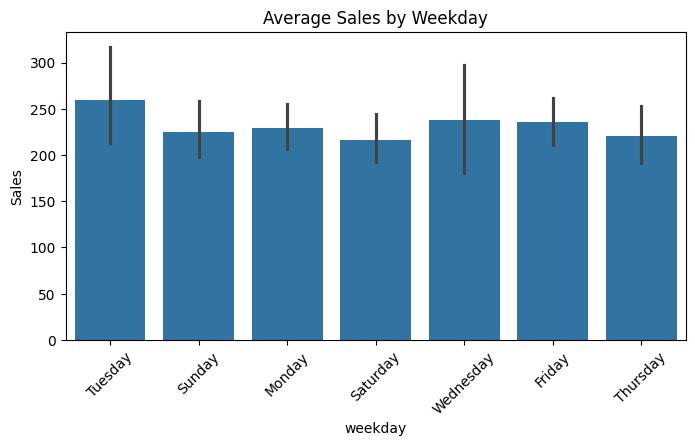

In [7]:
plt.figure(figsize=(8, 4))
sns.barplot(x='weekday', y='Sales', data=df)
plt.title("Average Sales by Weekday")
plt.xticks(rotation=45)
plt.show()


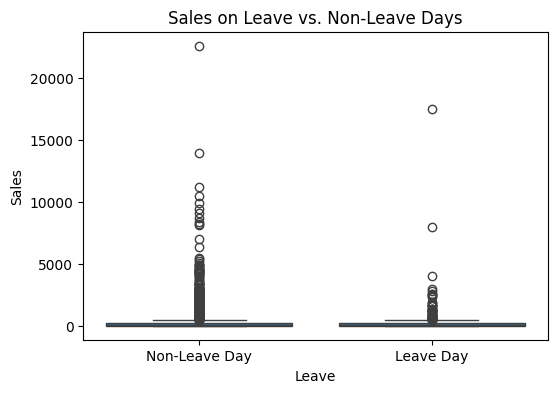

In [8]:
plt.figure(figsize=(6, 4))
sns.boxplot(x='Leave', y='Sales', data=df)
plt.title("Sales on Leave vs. Non-Leave Days")
plt.xticks([0, 1], ['Non-Leave Day', 'Leave Day'])
plt.show()


16:50:58 - cmdstanpy - INFO - Chain [1] start processing
16:50:59 - cmdstanpy - INFO - Chain [1] done processing


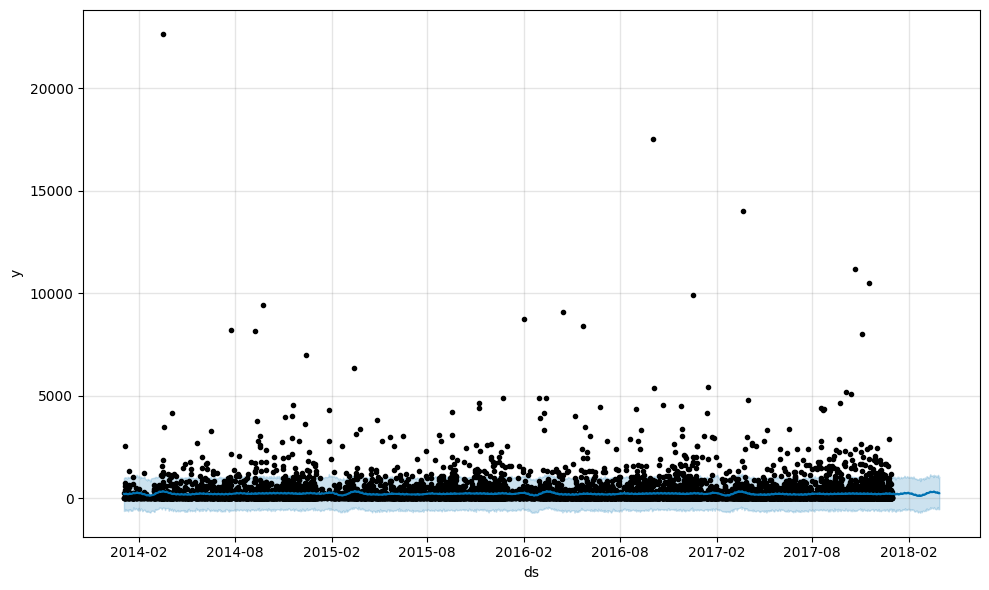

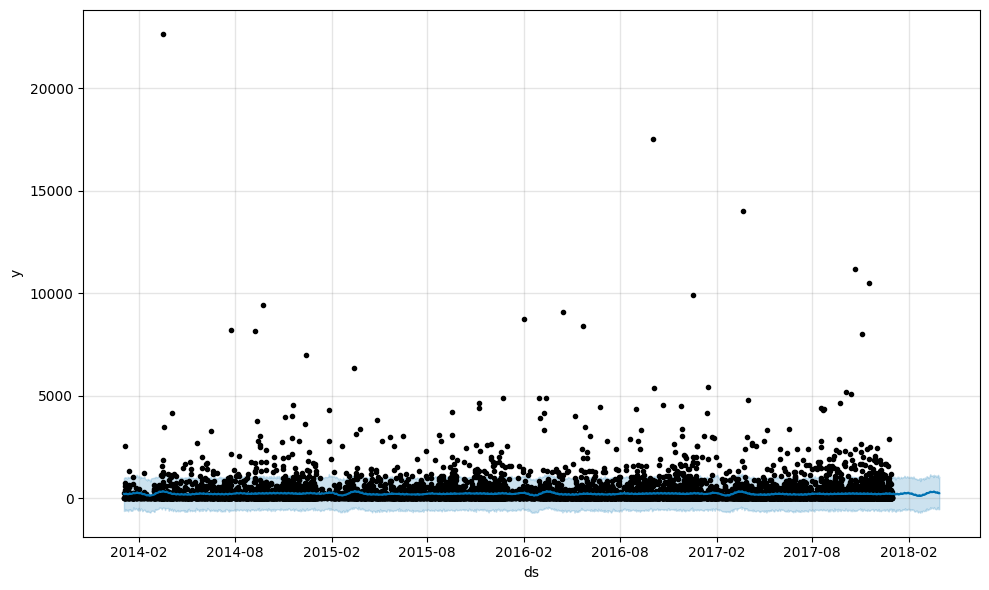

In [ ]:
from prophet import Prophet

df = df.rename(columns={'Order Date': 'ds', 'Sales': 'y'})
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)
model.plot(forecast)


In [17]:
forecast[['ds', 'yhat']].to_csv('forecast.csv', index=False)
